In [42]:
# Import useful libraries

import pandas as pd # DataFrame
import datetime as dt
import serial # Connect to arduino/read values
import csv
import time
datetime
#https://www.learnrobotics.org/blog/arduino-data-logger-csv/

NameError: name 'datetime' is not defined

In [8]:
# Board Setup
arduino_port = "/dev/ttyACM0" 
baud = 9600
fileName="analog-data.csv" # file to save recorded data
sensor_data =[]

In [24]:
ser = serial.Serial(arduino_port, baud) # Read serial port
print("Connected to Arduino port:", arduino_port)
file = open(fileName, "a") # append fileName (will create new if no file exists)
print("Created file")

Connected to Arduino port: /dev/ttyACM0
Created file


In [34]:
samples = 100 #how many samples to collect
line = 0
print_labels = False
sensor_data = [] #store data

# collect the samples
while line <= samples:
    getData=ser.readline()
    dataString = getData.decode('utf-8')
    data = dataString
    #print('data ', data)

    readings = data.split(" ")
    #print('reading ',readings)

    sensor_data.append(readings)
    #print('sensor_ data ',sensor_data)
    
    time.sleep(0)
    line = line+1
    

In [35]:
# create the CSV
with open(fileName, 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(sensor_data)

print("Data collection complete!")
file.close()

Data collection complete!


In [40]:
# Create data frame
dataset = pd.read_csv('analog-data.csv', names= ['analog','voltage','temperature'])


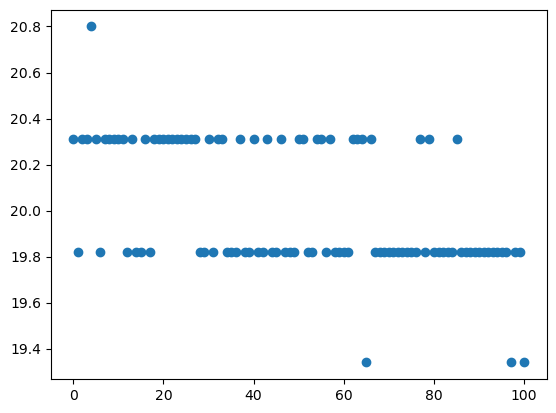

In [109]:
plt.scatter(dataset.index,dataset['temperature'])